# Stress Out:
### Stress prediction based  on Wellbeing and Lifestyle Survey Results
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import time


# Highlights

* A lot of re-running was done to achieve and get the best possible accuracy scores.
* The Random Forest Classifer became the best ML model for the dataset.
* Explored different CV techniques like MonteCarloCV and Stratifiedkfold.
* Hyperparameter tuning through RandomizedSearchCV was attempted.


# Data Pre-Processing

###  Step 1: Look at the missing values

No feature contains any missing or empty values

In [2]:
df_stress = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
df_stress.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

###  Steps 2 and 3. Remove or Imput the missing values

No feature have missing value

###  Step 4. Handle Categorical Data

The categorical data was handled and converted to equivalent numerical form

In [3]:
df_stress['GENDER'] = df_stress['GENDER'].replace({'Male': 0, 'Female': 1})
df_stress['STRESS_IDENTIFIER'] = df_stress['DAILY_STRESS'].replace({0:0, 1:0, 2:0,3:1,4:1,5:1})
col_dummies = df_stress[['AGE']]
col_new = pd.get_dummies(col_dummies, drop_first=False)
df_stress = df_stress.merge(col_new, how ='left', left_index = True, right_index = True)
df_stress = df_stress.drop(['AGE','Timestamp','WORK_LIFE_BALANCE_SCORE','DAILY_STRESS'],axis = 1)


The predictors and target was set to be used prior scaling

In [4]:
#Set the predictors and target
X = df_stress.drop(['STRESS_IDENTIFIER'],axis = 1)
y = df_stress['STRESS_IDENTIFIER']
feature_names = np.array(X.columns)

###  Step 5: Apply Scaler

The data was scaled using the StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(X)
scaled_predictors = scaler.transform(X)

# Exploratory Data Analytics

I checked the PCC to see first the target variable distribution. The result displayed a good distribution.

Proportion Chance Criterion: 51.59%
1.25 * Proportion Chance Criterion: 64.49%


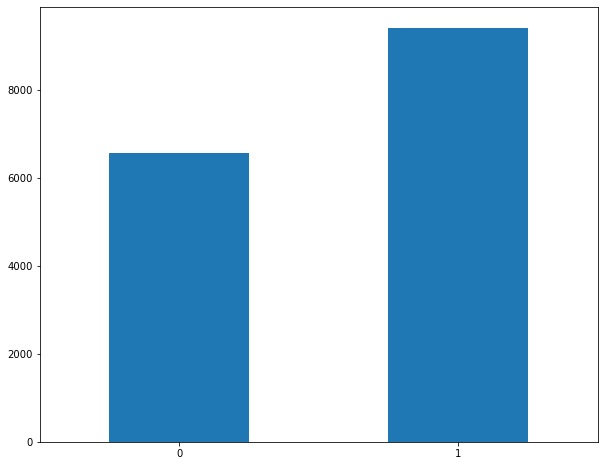

In [6]:
ry = y.replace({0: 'Not Stressed' , 1: 'Stressed'})
y_counts = Counter(y)
df = pd.DataFrame.from_dict(y_counts , orient='index')
plt.rcParams["figure.figsize"] = (10,8)
df.plot(kind='bar')
plt.xticks(rotation = 0) 
plt.legend().remove()

num=(df[0]/df[0].sum())**2

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

### Run the automated Machine Learning 

I set the Number of trials to 10 and this was used by the following models

* Logistic Regression L2
* Logistic Regression L1
* Linear SVM L2
* Linear SVM L1
* Decision Tree 
* Random Forest 
* Gradient Boosting Method

Based on the results, Random Forest gave the top accuracy at 69.45% with hyperparameter at Maxdepth=14. The top predictor is DAILY SHOUTING, which is also common for the Decision Tree and GBM.

In [7]:
#Set Number of Trials
Number_trials=10
display(X)

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,3,2,5,0,5,2,0,1,6,4,...,5,1,4,0,5,1,0,1,0,0
1,2,4,3,8,10,5,2,2,5,2,...,2,2,3,2,6,1,0,1,0,0
2,2,3,4,4,10,3,2,2,2,2,...,2,2,4,8,3,1,0,1,0,0
3,3,10,3,10,7,2,5,2,3,5,...,5,1,5,2,0,1,0,0,1,0
4,5,3,3,10,4,2,4,2,5,0,...,0,2,8,1,5,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,3,0,4,0,10,0,4,2,8,2,...,1,1,5,2,5,1,0,0,1,0
15967,3,6,8,7,4,6,3,1,7,5,...,0,2,10,5,8,1,1,0,0,0
15968,4,0,10,10,8,6,5,1,7,3,...,1,2,10,1,10,0,1,0,0,0
15969,1,10,8,2,7,3,2,1,6,10,...,2,2,1,6,8,1,1,0,0,0


In [8]:
def train_logistic(X, y, reg):
    start_time = time.time()
    C = [1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg,max_iter=10000,
                                        solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg,
                                        max_iter=10000, dual=False).fit(X_train, y_train)
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            weighted_coefs.append(np.abs(lr.coef_))
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    score_train_means = np.mean(score_train, axis=0)
    score_test_means = np.mean(score_test, axis=0)
    best_index = np.argmax(score_test_means)

    mean_abs_coefs = np.mean(weighted_coefs, axis=0)[0]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = f'Logistic Regression {reg.upper()}'
    best_train = np.amax(score_train_means)
    best_test = np.amax(score_test_means)
    hyperparam = "C"
    best_param = C[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name, ha = 'center',y = 1.01)  
    fig.tight_layout()

    fig = plt.figure(figsize=(15, 6))
    plt.plot(C, np.array(score_train).mean(axis=0), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
    plt.plot(C, np.array(score_test).mean(axis=0), label="test accuracy",color='red', marker='^', linestyle='-', markersize=15)
    plt.ylabel("Accuracy", fontsize=15)
    plt.xlabel(hyperparam,fontsize=15)
    plt.xscale('log')
    plt.suptitle(model_name, ha = 'center',y = .92)  
    plt.legend()


    run_time = (time.time() - start_time)
    return [model_name, best_train, best_test, hyperparam, best_param, best_predictor, run_time]


In [9]:
def train_svm(X, y, reg):
    start_time = time.time()
    C = [1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, max_iter=10000,
                                dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg, max_iter=10000,
                                dual=False).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
            weighted_coefs.append(np.abs(svc.coef_))
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 
    score_train_means = np.mean(score_train, axis=0)
    score_test_means = np.mean(score_test, axis=0)
    best_index = np.argmax(score_test_means)

    mean_abs_coefs = np.mean(weighted_coefs, axis=0)[0]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = f'Linear SVM {reg.upper()}'
    best_train = np.amax(score_train_means)
    best_test = np.amax(score_test_means)
    hyperparam = "C"
    best_param = C[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name, ha = 'center',y = 1.01)   
    fig.tight_layout()

    fig = plt.figure(figsize=(15, 6))
    plt.plot(C, np.array(score_train).mean(axis=0), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
    plt.plot(C, np.array(score_test).mean(axis=0), label="test accuracy",color='red', marker='^', linestyle='-', markersize=15)
    plt.ylabel("Accuracy", fontsize=15)
    plt.xlabel(hyperparam,fontsize=15)
    plt.xscale('log')
    plt.suptitle(model_name, ha = 'center',y = .92)  
    plt.legend()
    
    run_time = (time.time() - start_time)
    return [model_name, best_train, best_test, hyperparam, best_param, best_predictor, run_time]


In [10]:
def train_DT(X, y, reg=None):
    start_time = time.time()
    score_train = []
    score_test = []
    weighted_coefs=[]
    maxdepth_settings = range(1, 11)

    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

        for depth in maxdepth_settings:   
            tree = DecisionTreeClassifier(max_depth=depth)
            tree.fit(X_train, y_train)
            training_accuracy.append(tree.score(X_train, y_train))
            test_accuracy.append(tree.score(X_test, y_test))
            weighted_coefs.append(np.abs(tree.feature_importances_))

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    score_train_means = np.mean(score_train, axis=0)
    score_test_means = np.mean(score_test, axis=0)
    best_index = np.argmax(score_test_means)

    mean_abs_coefs = np.mean(weighted_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Decision Tree"
    best_train = np.amax(score_train_means)
    best_test = np.amax(score_test_means)
    hyperparam = "Max depth"
    best_param = maxdepth_settings[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name, ha = 'center',y = 1.01)    
    fig.tight_layout()

    fig = plt.figure(figsize=(15, 6))
    plt.plot(maxdepth_settings, np.array(score_train).mean(axis=0), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
    plt.plot(maxdepth_settings, np.array(score_test).mean(axis=0), label="test accuracy",color='red', marker='^', linestyle='-', markersize=15)
    plt.ylabel("Accuracy", fontsize=15)
    plt.xlabel(hyperparam,fontsize=15)
    plt.suptitle(model_name, ha = 'center',y = .92)  
    plt.legend()

    run_time = (time.time() - start_time)
    return [model_name, best_train, best_test, hyperparam, best_param, best_predictor, run_time]


In [11]:
def train_RF(X, y, reg=None):
    start_time = time.time()
    maxdepth_settings = range(1, 15)
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for depth in maxdepth_settings:
            rfc = RandomForestClassifier(n_estimators=300, max_depth=depth).fit(X_train, y_train)
            training_accuracy.append(rfc.score(X_train, y_train))
            test_accuracy.append(rfc.score(X_test, y_test))
            weighted_coefs.append(np.abs(rfc.feature_importances_))

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 
    score_train_means = np.mean(score_train, axis=0)
    score_test_means = np.mean(score_test, axis=0)
    best_index = np.argmax(score_test_means)

    mean_abs_coefs = np.mean(weighted_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Random Forest"
    best_train = np.amax(score_train_means)
    best_test = np.amax(score_test_means)
    hyperparam = "Max depth"
    best_param = maxdepth_settings[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name, ha = 'center',y = 1.01)  
    fig.tight_layout()

    fig = plt.figure(figsize=(15, 6))
    plt.plot(maxdepth_settings, np.array(score_train).mean(axis=0), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
    plt.plot(maxdepth_settings, np.array(score_test).mean(axis=0), label="test accuracy",color='red', marker='^', linestyle='-', markersize=15)
    plt.ylabel("Accuracy", fontsize=15)
    plt.xlabel(hyperparam,fontsize=15)
    plt.suptitle(model_name, ha = 'center',y = .92)  
    plt.legend()

    run_time = (time.time() - start_time)
    return [model_name, best_train, best_test, hyperparam, best_param, best_predictor, run_time]


In [12]:
def train_GBM(X, y, reg=None):
    start_time = time.time()
    maxdepth_settings = range(1, 11)
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for depth in maxdepth_settings:
            gbc = GradientBoostingClassifier(n_estimators=100, max_depth=depth).fit(X_train, y_train)
            training_accuracy.append(gbc.score(X_train, y_train))
            test_accuracy.append(gbc.score(X_test, y_test))
            weighted_coefs.append(np.abs(gbc.feature_importances_))
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 
    score_train_means = np.mean(score_train, axis=0)
    score_test_means = np.mean(score_test, axis=0)
    best_index = np.argmax(score_test_means)

    mean_abs_coefs = np.mean(weighted_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Gradient Boosting Method"
    best_train = np.amax(score_train_means)
    best_test = np.amax(score_test_means)
    hyperparam = "Max depth"
    best_param = maxdepth_settings[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name, ha = 'center',y = 1.01)  
    fig.tight_layout()

    fig = plt.figure(figsize=(15, 6))
    plt.plot(maxdepth_settings, np.array(score_train).mean(axis=0), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
    plt.plot(maxdepth_settings, np.array(score_test).mean(axis=0), label="test accuracy",color='red', marker='^', linestyle='-', markersize=15)
    plt.ylabel("Accuracy", fontsize=15)
    plt.xlabel(hyperparam,fontsize=15)
    plt.suptitle(model_name, ha = 'center',y = .92)  
    plt.legend()

    run_time = (time.time() - start_time)
    return [model_name, best_train, best_test, hyperparam, best_param, best_predictor, run_time]


,Classifier Method,Train accuracy,Validation accuracy,Hyperparameter,Optimal value,Top predictor,Run time
0,Logistic Regression L2,0.673101,0.671099,C,300,GENDER,40.390822
1,Logistic Regression L1,0.673084,0.671049,C,300,AGE_21 to 35,205.197473
2,Linear SVM L2,0.673334,0.670373,C,20,GENDER,46.264210
3,Linear SVM L1,0.673234,0.670398,C,0.2,AGE_21 to 35,472.213469
4,Decision Tree,0.778536,0.649962,Max depth,5,DAILY_SHOUTING,9.023214
5,Random Forest,0.992737,0.695367,Max depth,14,DAILY_SHOUTING,1167.026649
6,Gradient Boosting Method,1.000000,0.681968,Max depth,6,DAILY_SHOUTING,1176.628542


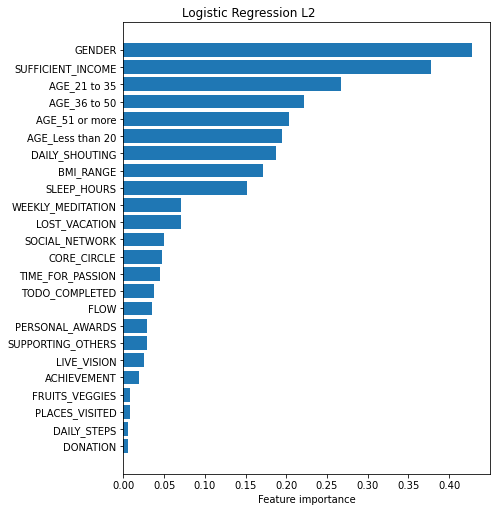

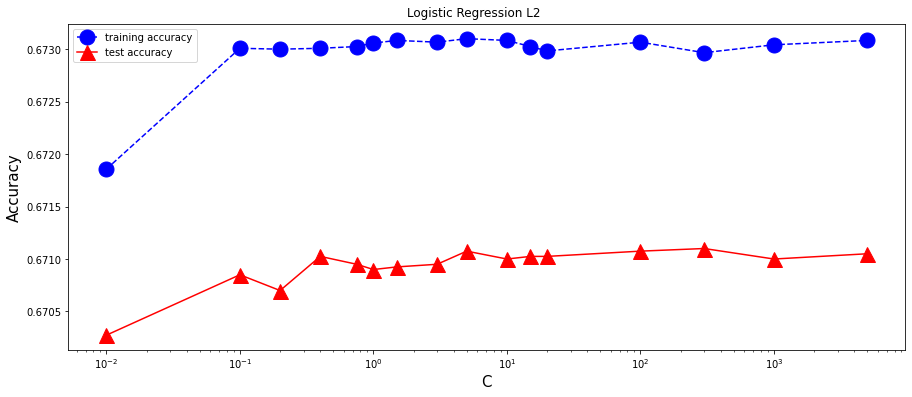

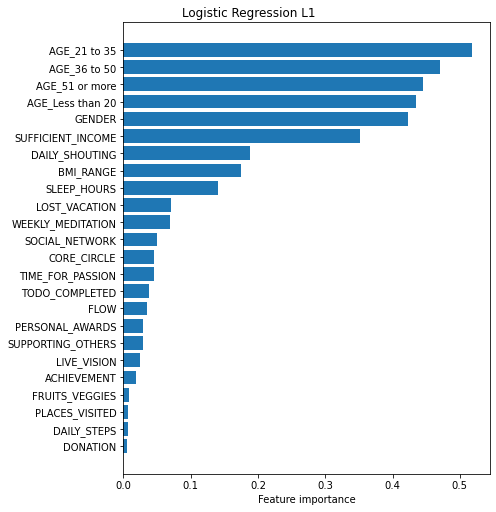

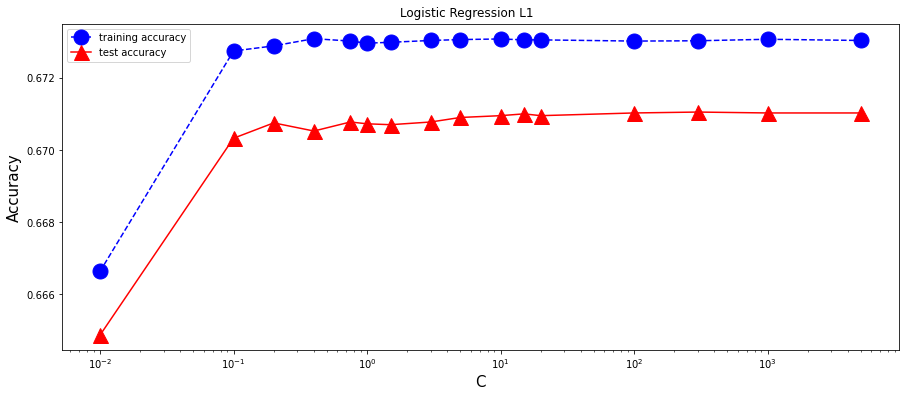

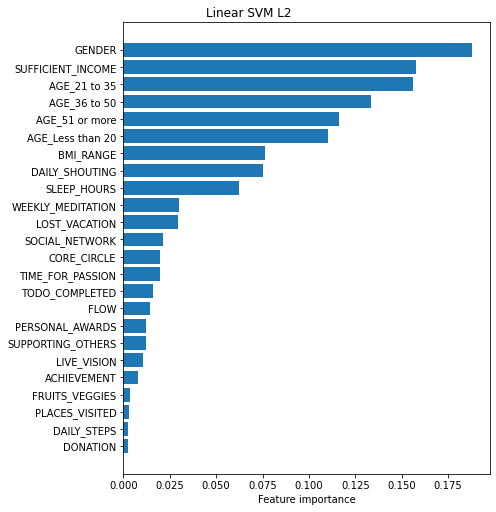

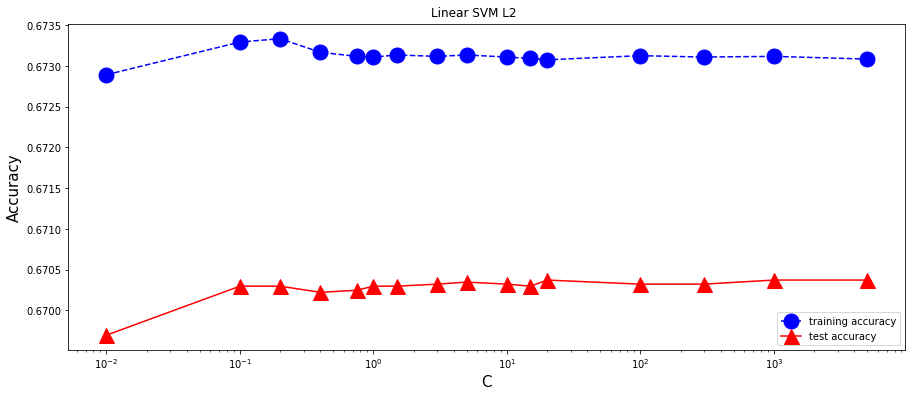

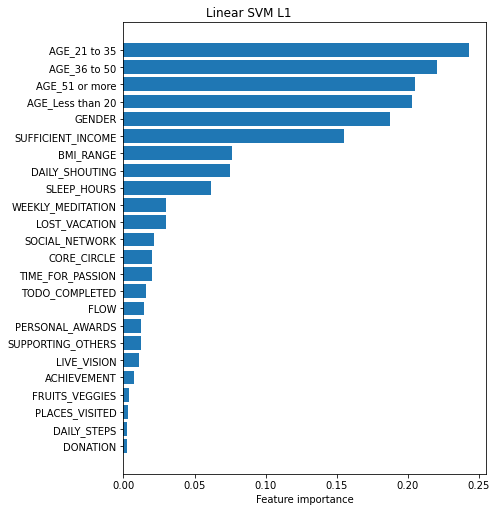

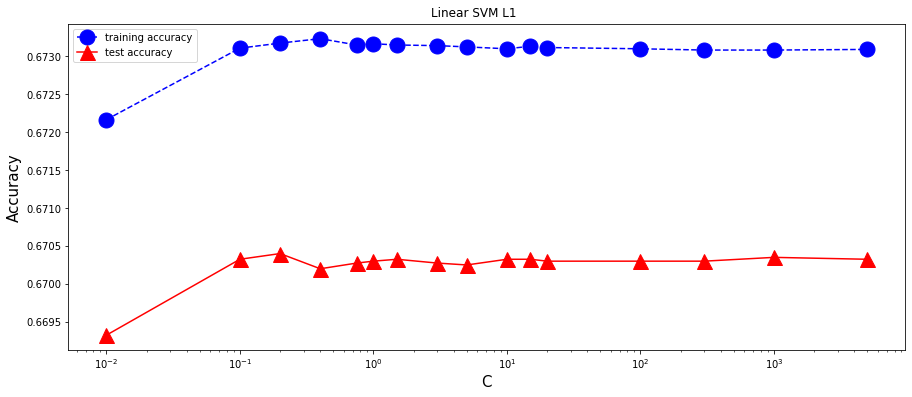

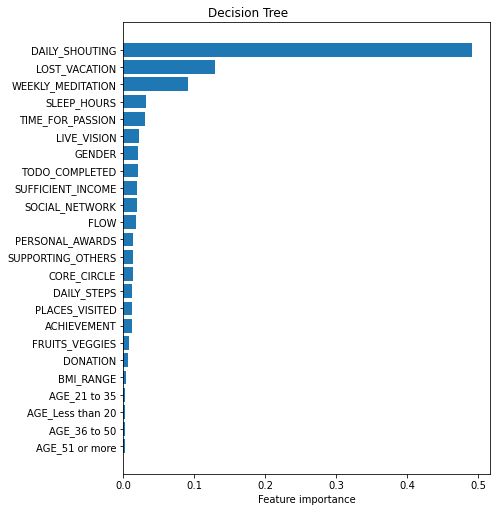

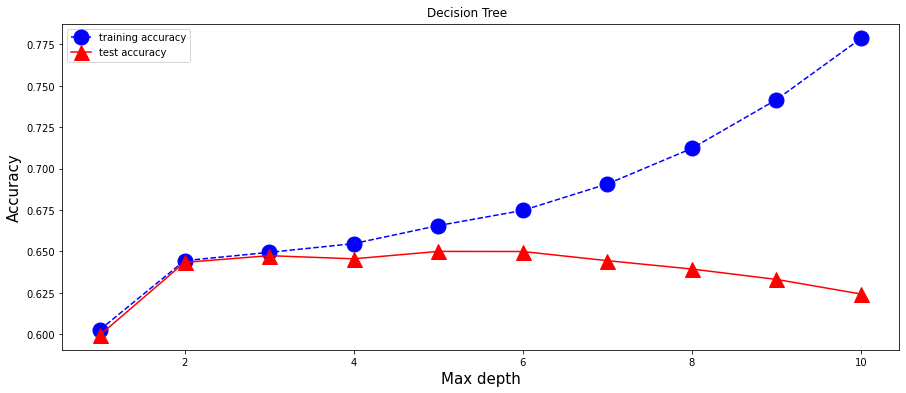

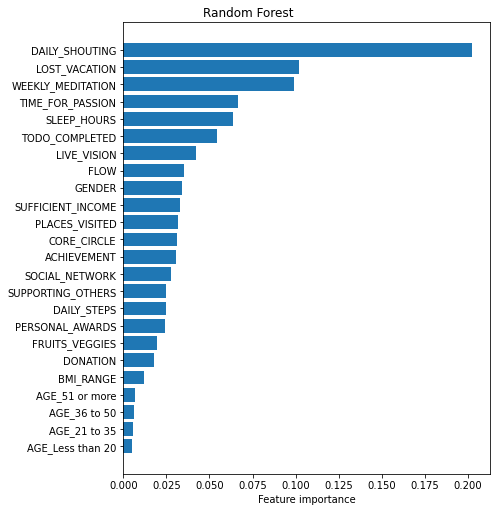

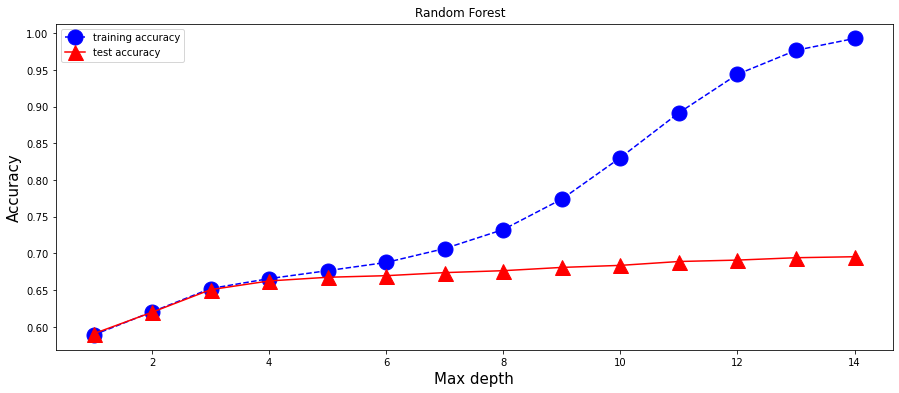

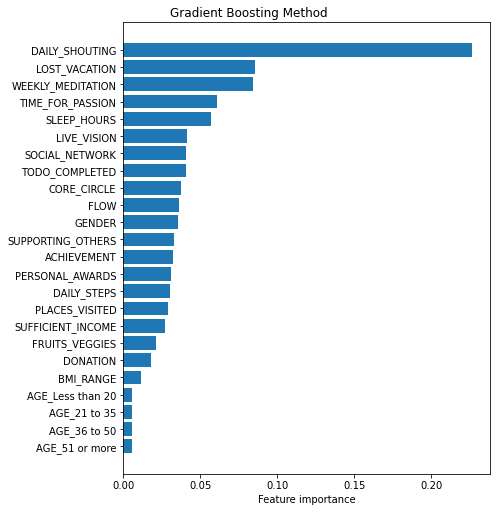

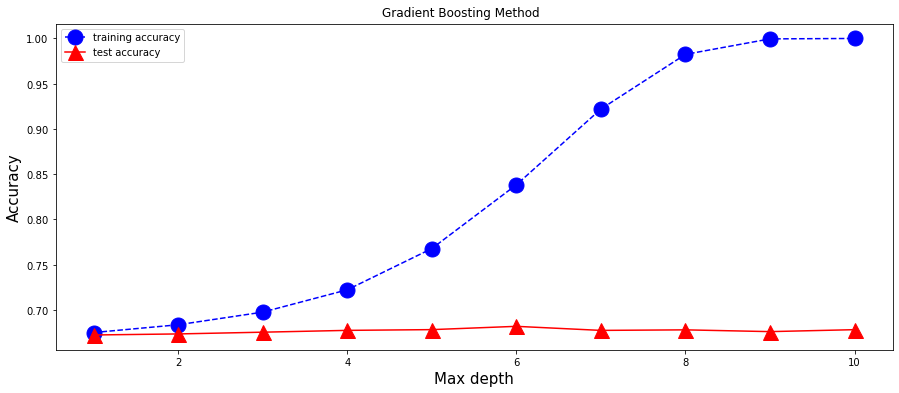

In [13]:
cols = ['Classifier Method', 'Train accuracy', 'Validation accuracy',
        'Hyperparameter', 'Optimal value', 'Top predictor', 'Run time']

df_results = pd.DataFrame(columns=cols)

# df_results.loc[0] = train_knn(X, y, reg=None)
df_results.loc[0] = train_logistic(X,y,reg='l2')
df_results.loc[1] = train_logistic(X,y,reg='l1')
df_results.loc[2] = train_svm(X,y,reg='l2')
df_results.loc[3] = train_svm(X,y,reg='l1')
df_results.loc[4] = train_DT(X, y, reg=None)
df_results.loc[5] = train_RF(X, y, reg=None)
df_results.loc[6] = train_GBM(X, y, reg=None)

display(df_results)

Moreover, in an attempt to improve the accuracy scores, RandomizedSearchCV with Stratifiedkfold CV was introduced. The results did not give higher results though it is still at par with the previous scores

RandomForestClassifier

In [14]:
X = X.copy()
y = y.copy()

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2)


#RandomForestClassifier
train_mean = []
test_mean = []
for i in range(Number_trials):
    classifier = RandomForestClassifier(random_state=i)
    params = {'max_depth': list(range(3, 20)),
              'n_estimators': [100,200,300],
              'max_features': ['auto']
             }
    crossval = StratifiedKFold(n_splits=10,
                           shuffle=True,
                           random_state=i)

    rs = RandomizedSearchCV(classifier,
                        params,
                        n_jobs=-1,
                        scoring='accuracy',
                        cv=crossval,
                        return_train_score=True).fit(X_train, y_train)
    a = pd.DataFrame(rs.cv_results_)
    train_mean.append(np.mean(a['mean_train_score'].values))
    test_mean.append(np.mean(a['mean_test_score'].values))
b=pd.DataFrame(train_mean)
c=pd.DataFrame(test_mean)
d=pd.concat([b,c],axis=1)
d.columns = ['Train accuracy','Validation accuracy']   
d

,Train accuracy,Validation accuracy
0,0.829301,0.680426
1,0.851189,0.680801
2,0.882315,0.683657
3,0.805724,0.674727
4,0.854052,0.683346
5,0.823052,0.678128
6,0.902364,0.685152
7,0.876567,0.683908
8,0.863184,0.680736
9,0.785661,0.674506


DecisionTreeClassifier

In [15]:
X = X.copy()
y = y.copy()

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2)


#DecisionTree
DT_train_mean = []
DT_test_mean = []
for i in range(Number_trials):
    classifier = DecisionTreeClassifier(random_state=i)
    params = {'max_depth': list(range(3, 20)),
              'max_features': ['auto']}
    crossval = StratifiedKFold(n_splits=10,
                           shuffle=True,
                           random_state=i)
# Random Search
    rs = RandomizedSearchCV(classifier,
                        params,
                        n_jobs=-1,
                        scoring='accuracy',
                        cv=crossval,
                        return_train_score=True).fit(X_train, y_train)
    a = pd.DataFrame(rs.cv_results_)
    DT_train_mean.append(np.mean(a['mean_train_score'].values))
    DT_test_mean.append(np.mean(a['mean_test_score'].values))
b=pd.DataFrame(train_mean)
c=pd.DataFrame(test_mean)
d=pd.concat([b,c],axis=1)
d
d.columns = ['Train accuracy','Validation accuracy']   
d

,Train accuracy,Validation accuracy
0,0.829301,0.680426
1,0.851189,0.680801
2,0.882315,0.683657
3,0.805724,0.674727
4,0.854052,0.683346
5,0.823052,0.678128
6,0.902364,0.685152
7,0.876567,0.683908
8,0.863184,0.680736
9,0.785661,0.674506


# Results and Discussion


From the original dataset of 24 features, surprisingly even with the one-hot encoding and dropping of other features it still manage to retain the same number of features. The number of rows was also retained at 15972.

After the ML model execution, below are the results and findings:
* The Random Forest model accuracy score is quite good, since it is above the baseline score of the desired PCC (69.45% vs 64.9%). 
* The top predictor DAILY_SHOUTING seems like outweighs the other features. Moreover, checking the other models, the top predictors varies from Gender to Age features.
* An attempt to improved the accuracy results was done by having hyperparameter tuning like RandomizedSearchCV and use of Stratifiedkfold. The results are respectable but it was not able to top the RF model scores. 

There are still a lot of room to improve regarding the execution of the ML methods above. Having a feature that clearly outweighs the other features can give an impression that something is off in the model. Hypertuning the parameters and cross validation are crucial to fix it and help to gain the best possible accuracy from this dataset.



# Conclusion

The creation of the ML model from a survey dataset is quite challenging since there could be some form of bias from the respondents which is needed to be considered. The results should be treated only as a guide if we want to use it as indicators of our stressors. Also, as what was mentioned, not all datasets are created equal. There could be sets of data that can give a low accuracy score even after a lot of tuning done. Moreover, given more time and expertise to explore, hyperparameter tuning would be really a great help if used correctly. It would decreased the need to do multiple re-runs and getting the top parameters and features will be a lot easier. Overall, this project has been a good practice to explore and familiarize ourselves to the world of machine learning and I hope this would be a great start.